In [1]:
#Importing Necessary Liberaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [2]:
#Reading  defects csv file
defect_df = pd.read_csv("NetCracker TMS 2023-06-03T08_28_14+0100.csv")

C:\Users\mach1220\AppData\Local\Temp\5\ipykernel_15940\426866695.py:2: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  defect_df = pd.read_csv("NetCracker TMS 2023-06-03T08_28_14+0100.csv")


<H1>Feature Engineering</H1>

In [3]:
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28445 entries, 0 to 28444
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Ticket key                             28445 non-null  object 
 1   Ticket id                              28445 non-null  int64  
 2   Parent id                              7147 non-null   float64
 3   Summary                                28445 non-null  object 
 4   Custom field (External Issue ID)       13187 non-null  object 
 5   Priority                               28445 non-null  object 
 6   Labels                                 24571 non-null  object 
 7   Labels.1                               23515 non-null  object 
 8   Labels.2                               22543 non-null  object 
 9   Labels.3                               18524 non-null  object 
 10  Labels.4                               13590 non-null  object 
 11  La

In [4]:
#Remove colums not needed for your analysis- Here removed columns starting wiht similar names
cols_to_drop = [col for col in defect_df.columns if col.startswith(('Labels','Component/s.','Fix Version/s.'))]
defect_df = defect_df.drop(columns=cols_to_drop)
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28445 entries, 0 to 28444
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Ticket key                             28445 non-null  object 
 1   Ticket id                              28445 non-null  int64  
 2   Parent id                              7147 non-null   float64
 3   Summary                                28445 non-null  object 
 4   Custom field (External Issue ID)       13187 non-null  object 
 5   Priority                               28445 non-null  object 
 6   Status                                 28445 non-null  object 
 7   Assignee                               28351 non-null  object 
 8   Component/s                            28445 non-null  object 
 9   Fix Version/s                          9981 non-null   object 
 10  Custom field (Target Build)            6601 non-null   object 
 11  Cr

In [5]:
#Remove colums not needed for your analysis
defect_df = defect_df.drop(['Ticket id','Parent id','Summary','Custom field (Target Build)','Custom field (Environment Type)','Custom field (Pending Info From)','Custom field (Epic Link)','Custom field (External Due Date)','Custom field (Last Commit Number)','Due Date','Creator','Resolved'],axis=1)
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28445 entries, 0 to 28444
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Ticket key                             28445 non-null  object
 1   Custom field (External Issue ID)       13187 non-null  object
 2   Priority                               28445 non-null  object
 3   Status                                 28445 non-null  object
 4   Assignee                               28351 non-null  object
 5   Component/s                            28445 non-null  object
 6   Fix Version/s                          9981 non-null   object
 7   Created                                28445 non-null  object
 8   Updated                                28445 non-null  object
 9   Resolution                             27285 non-null  object
 10  Custom field (Root Cause Description)  19086 non-null  object
dtypes: object(11)
m

In [6]:
#checking the statistice of External issues(INC/PBI)  Vs internal issue were external issue ID is missing are not part of the defects
print('Total Tickets: ', len(defect_df))
print ('Total Tickets missing external issue ID :', defect_df['Custom field (External Issue ID)'].isnull().sum())
print ('Total Tickets having external issue ID  :', len(defect_df) - defect_df['Custom field (External Issue ID)'].isnull().sum())

Total Tickets:  28445
Total Tickets missing external issue ID : 15258
Total Tickets having external issue ID  : 13187


In [7]:
#Converting Created date columns in datetime format
defect_df['Created'] = pd.to_datetime(defect_df['Created'])


In [8]:
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28445 entries, 0 to 28444
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Ticket key                             28445 non-null  object        
 1   Custom field (External Issue ID)       13187 non-null  object        
 2   Priority                               28445 non-null  object        
 3   Status                                 28445 non-null  object        
 4   Assignee                               28351 non-null  object        
 5   Component/s                            28445 non-null  object        
 6   Fix Version/s                          9981 non-null   object        
 7   Created                                28445 non-null  datetime64[ns]
 8   Updated                                28445 non-null  object        
 9   Resolution                             27285 non-null  object

In [9]:
#Add New column External defect True / false to signify External or Internal Defects
mask = defect_df['Custom field (External Issue ID)'].str.contains('INC|PBI|WO')== True 
defect_df['External_defect'] = mask.astype('category')


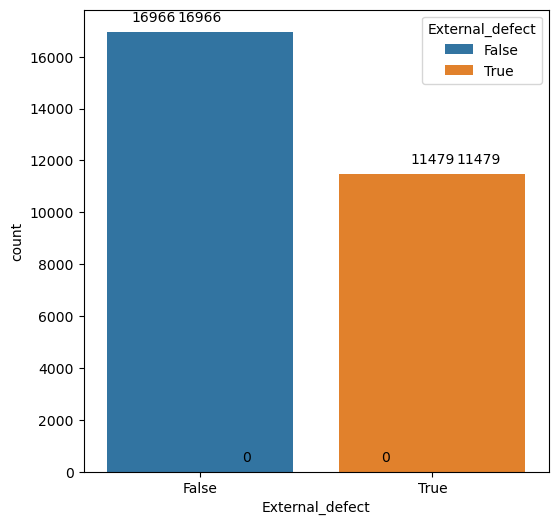

In [10]:
# print(defect_df['External_defect'].value_counts())

# Set the figure size and the number of categories to display
plt.figure(figsize=(6, 6))  # Adjust the figure size as desired

sns.countplot(data=defect_df, x='External_defect',hue='External_defect')

# # Customize the bar width
# total_categories = len(defect_df['External_defect'].unique())
# bar_width = 0.3  # Adjust the value to control the bar width

ax = sns.countplot(data=defect_df, x='External_defect')

# # Adjust the width of the bars
# for bar in ax.patches:
#     bar.set_width(bar_width)

# # plt.legend(title='Legend', loc='upper right')

# # Add value labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [11]:
defect_df.head()

Ticket key Custom field (External Issue ID)  Priority Status  Assignee  \
0  TFNUK-896708                     TFNUK-117346  Critical   Open  sanv0922   
1  TFNUK-896706                     TFNUK-117343  Critical   Open  hech0716   
2  TFNUK-896705                  INC000005820163     Major   Open  gati0917   
3  TFNUK-896704                              NaN  Critical   Open  allo0514   
4  TFNUK-896703                              NaN  Critical   Open  allo0514   

    Component/s Fix Version/s             Created            Updated  \
0        MS_RBM           NaN 2023-06-03 06:38:00  03/Jun/23 6:40 AM   
1        MS_RBM           NaN 2023-06-03 03:21:00  03/Jun/23 6:02 AM   
2  MS_eCommerce           NaN 2023-06-03 01:40:00  03/Jun/23 6:02 AM   
3  Infra (TOMS)           NaN 2023-06-03 01:39:00  03/Jun/23 6:02 AM   
4  Infra (TOMS)           NaN 2023-06-03 01:31:00  03/Jun/23 6:02 AM   

  Resolution Custom field (Root Cause Description) External_defect  
0        NaN                                   NaN           False  
1        NaN                                   NaN           False  
2        NaN                                   NaN            True  
3        NaN                                   NaN           False  
4        NaN                                   NaN           False

In [12]:
#Create addtional columns for Month and year 
defect_df['created_month'] = defect_df['Created'].dt.strftime('%B')
defect_df['created_Year'] = defect_df['Created'].dt.strftime('%Y')
defect_df['created_Mon_Yr'] = defect_df['Created'].dt.strftime('%B') + '-' + defect_df['Created'].dt.strftime('%Y')
defect_df['created_Mon_Yr'] = pd.to_datetime(defect_df['created_Mon_Yr'])
# defect_df['created_Mon_Yr'] = defect_df['created_Mon_Yr'].dt.strftime("%B-%Y")
# defect_df.drop(defect_df['created_month','created_Year'])
defect_df.head()

Ticket key Custom field (External Issue ID)  Priority Status  Assignee  \
0  TFNUK-896708                     TFNUK-117346  Critical   Open  sanv0922   
1  TFNUK-896706                     TFNUK-117343  Critical   Open  hech0716   
2  TFNUK-896705                  INC000005820163     Major   Open  gati0917   
3  TFNUK-896704                              NaN  Critical   Open  allo0514   
4  TFNUK-896703                              NaN  Critical   Open  allo0514   

    Component/s Fix Version/s             Created            Updated  \
0        MS_RBM           NaN 2023-06-03 06:38:00  03/Jun/23 6:40 AM   
1        MS_RBM           NaN 2023-06-03 03:21:00  03/Jun/23 6:02 AM   
2  MS_eCommerce           NaN 2023-06-03 01:40:00  03/Jun/23 6:02 AM   
3  Infra (TOMS)           NaN 2023-06-03 01:39:00  03/Jun/23 6:02 AM   
4  Infra (TOMS)           NaN 2023-06-03 01:31:00  03/Jun/23 6:02 AM   

  Resolution Custom field (Root Cause Description) External_defect  \
0        NaN                                   NaN           False   
1        NaN                                   NaN           False   
2        NaN                                   NaN            True   
3        NaN                                   NaN           False   
4        NaN                                   NaN           False   

  created_month created_Year created_Mon_Yr  
0          June         2023     2023-06-01  
1          June         2023     2023-06-01  
2          June         2023     2023-06-01  
3          June         2023     2023-06-01  
4          June         2023     2023-06-01

In [13]:
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28445 entries, 0 to 28444
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Ticket key                             28445 non-null  object        
 1   Custom field (External Issue ID)       13187 non-null  object        
 2   Priority                               28445 non-null  object        
 3   Status                                 28445 non-null  object        
 4   Assignee                               28351 non-null  object        
 5   Component/s                            28445 non-null  object        
 6   Fix Version/s                          9981 non-null   object        
 7   Created                                28445 non-null  datetime64[ns]
 8   Updated                                28445 non-null  object        
 9   Resolution                             27285 non-null  object

In [14]:
print(defect_df['created_Mon_Yr'].value_counts().sort_index(ascending=False))


2023-06-01     144
2023-05-01    1603
2023-04-01    1284
2023-03-01    1713
2023-02-01    1383
2023-01-01    1174
2022-12-01    1217
2022-11-01    1454
2022-10-01    1097
2022-09-01    1114
2022-08-01     967
2022-07-01    1170
2022-06-01    1080
2022-05-01     750
2022-04-01    1158
2022-03-01    1135
2022-02-01     578
2022-01-01     600
2021-12-01     564
2021-11-01     714
2021-10-01     828
2021-09-01     518
2021-08-01     590
2021-07-01     373
2021-06-01     430
2021-05-01     671
2021-04-01     576
2021-03-01     479
2021-02-01     233
2021-01-01     406
2020-12-01     496
2020-11-01     372
2020-10-01     365
2020-09-01     278
2020-08-01     227
2020-07-01     259
2020-06-01     119
2020-05-01      67
2020-04-01      75
2020-03-01      15
2020-02-01      33
2020-01-01      11
2019-12-01      52
2019-11-01      16
2019-10-01      16
2019-09-01      12
2019-08-01       4
2019-07-01       7
2019-06-01       7
2019-05-01       6
2019-04-01       2
2019-03-01       1
2018-11-01  

Text(0.5, 1.0, 'Overall Incoming')

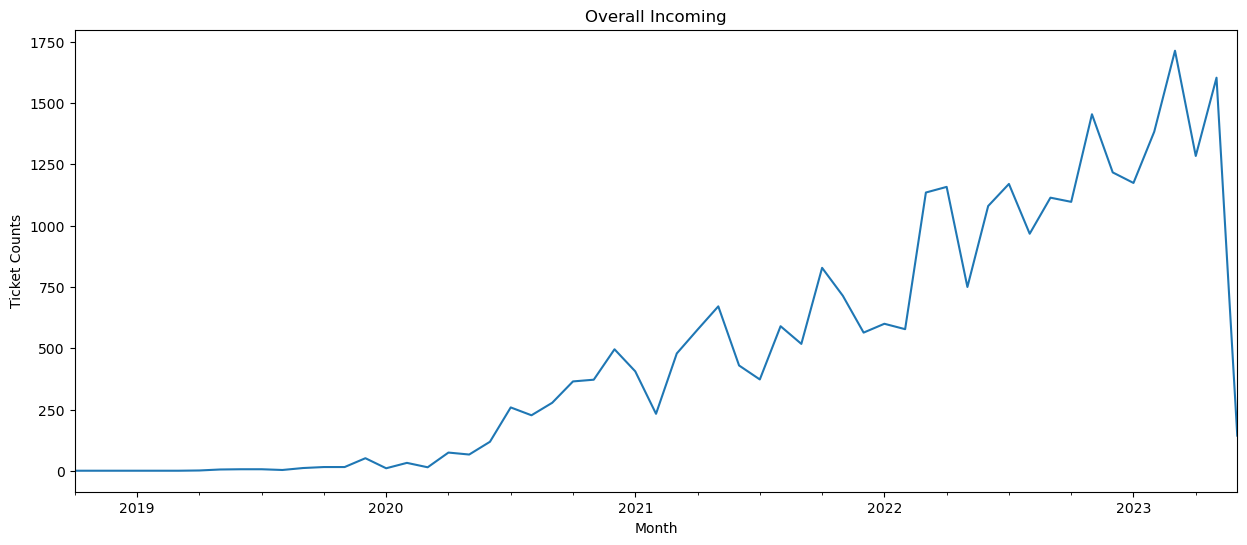

In [15]:
# defect_df['created_Mon_Yr'].value_counts().plot(figsize=(12, 6)) 

plt.figure(figsize=(15, 6))
monthly_counts = defect_df['created_Mon_Yr'].dt.to_period('M').value_counts().sort_index()
monthly_counts.plot()

plt.xlabel('Month')
plt.ylabel('Ticket Counts')
plt.title('Overall Incoming')

In [16]:
# check the status columns to this will help in createing Backlog coloumns based on the status
defect_df['Status'].value_counts()

Closed                       21834
Resolved                      1882
Passed                        1245
Cancelled                     1204
Ready for Testing             1041
Open                           441
In Assessment                  130
On Hold                        124
In Progress                    123
Additional Info Required       107
Passed With Minor Defects       94
Info Received                   78
Reopened                        24
Blocked                         20
In Analysis                     15
Failed                          15
In Build                        14
Assessed                        11
Ready for Retest                11
In Technical Review             10
Implemented                     10
QA Done                          6
In QA                            2
In Design                        2
Ready for Build                  1
Ready for Design                 1
Name: Status, dtype: int64

In [17]:
# print(defect_df['Ticket key'].notnull())
# #Create new COlumne Incoming in dataframe
mask = defect_df['Ticket key'].notnull()== True 
defect_df['Incoming'] = mask.astype(int)
defect_df.head()

Ticket key Custom field (External Issue ID)  Priority Status  Assignee  \
0  TFNUK-896708                     TFNUK-117346  Critical   Open  sanv0922   
1  TFNUK-896706                     TFNUK-117343  Critical   Open  hech0716   
2  TFNUK-896705                  INC000005820163     Major   Open  gati0917   
3  TFNUK-896704                              NaN  Critical   Open  allo0514   
4  TFNUK-896703                              NaN  Critical   Open  allo0514   

    Component/s Fix Version/s             Created            Updated  \
0        MS_RBM           NaN 2023-06-03 06:38:00  03/Jun/23 6:40 AM   
1        MS_RBM           NaN 2023-06-03 03:21:00  03/Jun/23 6:02 AM   
2  MS_eCommerce           NaN 2023-06-03 01:40:00  03/Jun/23 6:02 AM   
3  Infra (TOMS)           NaN 2023-06-03 01:39:00  03/Jun/23 6:02 AM   
4  Infra (TOMS)           NaN 2023-06-03 01:31:00  03/Jun/23 6:02 AM   

  Resolution Custom field (Root Cause Description) External_defect  \
0        NaN                                   NaN           False   
1        NaN                                   NaN           False   
2        NaN                                   NaN            True   
3        NaN                                   NaN           False   
4        NaN                                   NaN           False   

  created_month created_Year created_Mon_Yr  Incoming  
0          June         2023     2023-06-01         1  
1          June         2023     2023-06-01         1  
2          June         2023     2023-06-01         1  
3          June         2023     2023-06-01         1  
4          June         2023     2023-06-01         1

In [18]:
#Create new COlumne Backlog in dataframe
mask = defect_df['Status'].str.contains('Closed|Ready for Testing')== False 
defect_df['Backlog'] = mask.astype(int)
defect_df.head()

Ticket key Custom field (External Issue ID)  Priority Status  Assignee  \
0  TFNUK-896708                     TFNUK-117346  Critical   Open  sanv0922   
1  TFNUK-896706                     TFNUK-117343  Critical   Open  hech0716   
2  TFNUK-896705                  INC000005820163     Major   Open  gati0917   
3  TFNUK-896704                              NaN  Critical   Open  allo0514   
4  TFNUK-896703                              NaN  Critical   Open  allo0514   

    Component/s Fix Version/s             Created            Updated  \
0        MS_RBM           NaN 2023-06-03 06:38:00  03/Jun/23 6:40 AM   
1        MS_RBM           NaN 2023-06-03 03:21:00  03/Jun/23 6:02 AM   
2  MS_eCommerce           NaN 2023-06-03 01:40:00  03/Jun/23 6:02 AM   
3  Infra (TOMS)           NaN 2023-06-03 01:39:00  03/Jun/23 6:02 AM   
4  Infra (TOMS)           NaN 2023-06-03 01:31:00  03/Jun/23 6:02 AM   

  Resolution Custom field (Root Cause Description) External_defect  \
0        NaN                                   NaN           False   
1        NaN                                   NaN           False   
2        NaN                                   NaN            True   
3        NaN                                   NaN           False   
4        NaN                                   NaN           False   

  created_month created_Year created_Mon_Yr  Incoming  Backlog  
0          June         2023     2023-06-01         1        1  
1          June         2023     2023-06-01         1        1  
2          June         2023     2023-06-01         1        1  
3          June         2023     2023-06-01         1        1  
4          June         2023     2023-06-01         1        1

In [19]:
#validate the count of Closed and RFT Vs other status
print('Incoming', defect_df['Incoming'].value_counts())
print('Backlog',defect_df['Backlog'].value_counts())

Incoming 1    28445
Name: Incoming, dtype: int64
Backlog 0    22875
1     5570
Name: Backlog, dtype: int64


In [20]:
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28445 entries, 0 to 28444
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Ticket key                             28445 non-null  object        
 1   Custom field (External Issue ID)       13187 non-null  object        
 2   Priority                               28445 non-null  object        
 3   Status                                 28445 non-null  object        
 4   Assignee                               28351 non-null  object        
 5   Component/s                            28445 non-null  object        
 6   Fix Version/s                          9981 non-null   object        
 7   Created                                28445 non-null  datetime64[ns]
 8   Updated                                28445 non-null  object        
 9   Resolution                             27285 non-null  object

In [21]:

defect_incoming_backlog_df = pd.pivot_table(defect_df, values=['Incoming', 'Backlog'], index='created_Mon_Yr', aggfunc='sum')
defect_incoming_backlog_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2018-10-01 to 2023-06-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Backlog   54 non-null     int32
 1   Incoming  54 non-null     int32
dtypes: int32(2)
memory usage: 864.0 bytes


Text(0.5, 1.0, 'Overall Incoming vs Backlog')

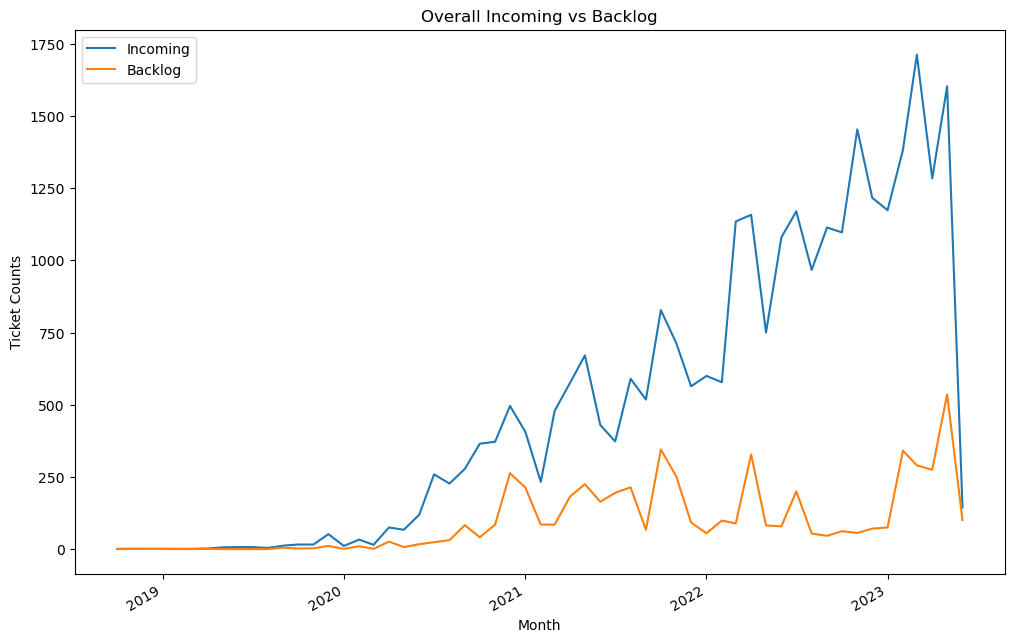

In [22]:
defect_incoming_backlog_df[['Incoming', 'Backlog']].plot(figsize=(12, 8)) 
# for index, row in defect_incoming_backlog_df.iterrows():
#     if not pd.isnull(row['Incoming']):
#         plt.text(index, row['Incoming'], str(int(row['Incoming'])), ha='center', va='bottom')
#     if not pd.isnull(row['Backlog']):
#         plt.text(index, row['Backlog'], str(int(row['Backlog'])), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Ticket Counts')
plt.title('Overall Incoming vs Backlog')

Text(0.5, 1.0, 'External Incoming vs Backlog')

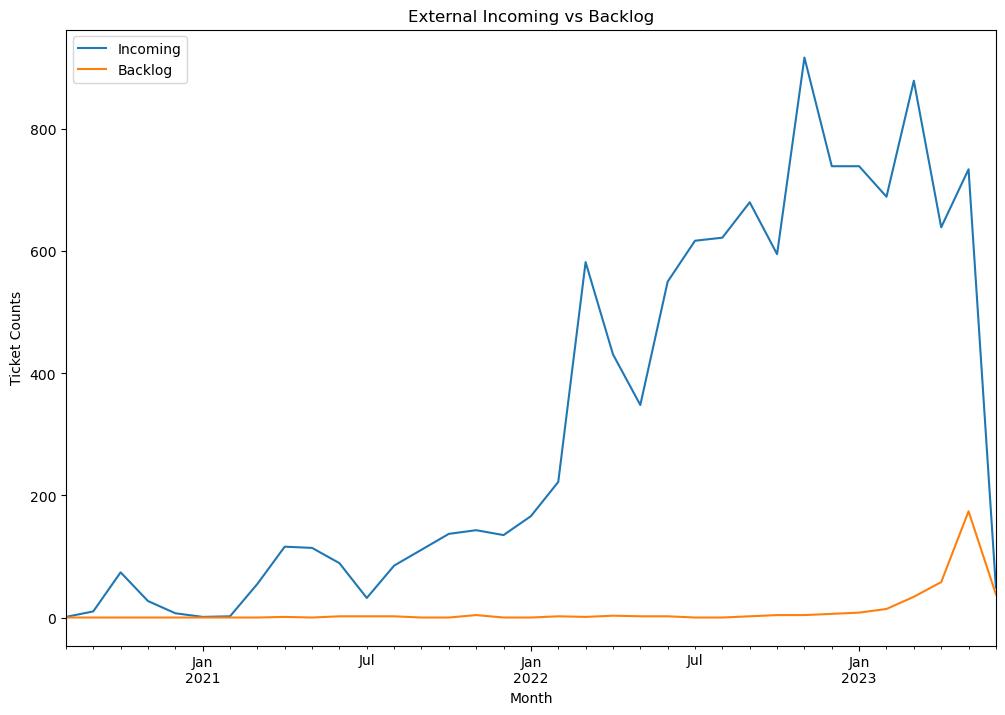

In [23]:
#create new DF with external issue is with INC/PBI
ext_defect_df = defect_df.loc[defect_df['Custom field (External Issue ID)'].str.contains('INC|PBI')== True]
# ext_defect_df.info()
ext_defect_incoming_backlog_df = pd.pivot_table(ext_defect_df, values=['Incoming', 'Backlog'], index='created_Mon_Yr', aggfunc='sum')
ext_defect_incoming_backlog_df[['Incoming', 'Backlog']].plot(figsize=(12, 8)) 
# for index, row in ext_defect_incoming_backlog_df.iterrows():
#     if not pd.isnull(row['Incoming']):
#         plt.text(index, row['Incoming'], str(int(row['Incoming'])), ha='center', va='bottom')
#     if not pd.isnull(row['Backlog']):
#         plt.text(index, row['Backlog'], str(int(row['Backlog'])), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Ticket Counts')
plt.title('External Incoming vs Backlog')

Text(0.5, 1.0, 'Internal Incoming vs Backlog')

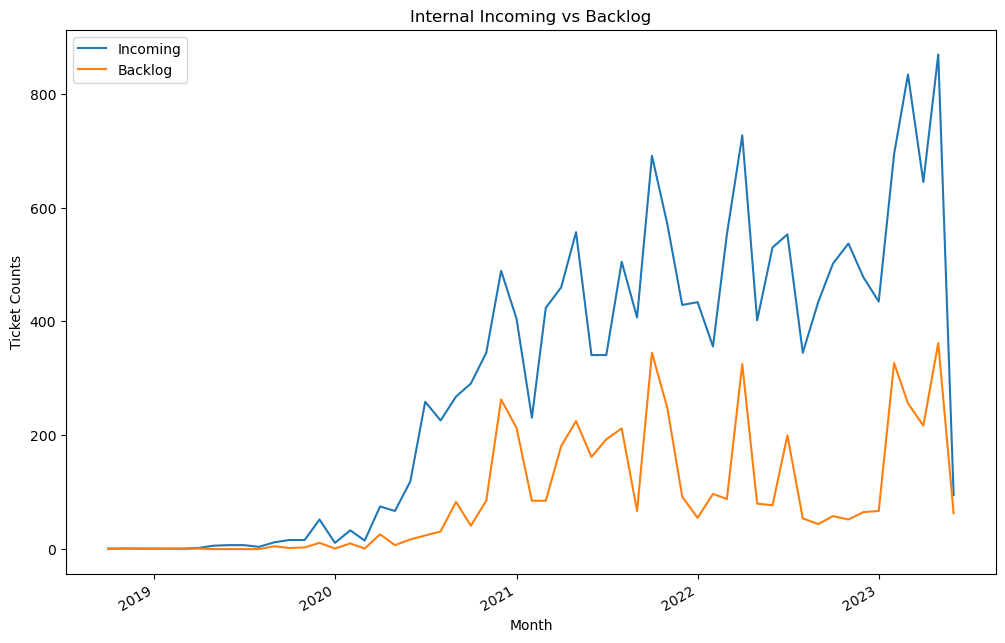

In [24]:
#create new DF with Internal issue not having INC/PBI
int_defect_df = defect_df.loc[(defect_df['Custom field (External Issue ID)'].isnull()) | (defect_df['Custom field (External Issue ID)'].str.contains('INC|PBI')== False)]
# int_defect_df.info()

int_defect_incoming_backlog_df = pd.pivot_table(int_defect_df, values=['Incoming', 'Backlog'], index='created_Mon_Yr', aggfunc='sum')
int_defect_incoming_backlog_df[['Incoming', 'Backlog']].plot(figsize=(12, 8)) 
# for index, row in int_defect_incoming_backlog_df.iterrows():
#     if not pd.isnull(row['Incoming']):
#         plt.text(index, row['Incoming'], str(int(row['Incoming'])), ha='center', va='bottom')
#     if not pd.isnull(row['Backlog']):
#         plt.text(index, row['Backlog'], str(int(row['Backlog'])), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Ticket Counts')
plt.title('Internal Incoming vs Backlog')

<H2>Exploratory data Analysis</H2>

In [25]:

backlog_pivot_df = pd.pivot_table(defect_df, index=['created_Mon_Yr'],columns='Backlog', values='Ticket key', aggfunc='count')
backlog_pivot_df.fillna(0,inplace=True)
# condition = backlog_pivot_df == 1
# filtered_pivot_table_df = backlog_pivot_df[condition]
backlog_pivot_df.head(10)

Backlog            0    1
created_Mon_Yr           
2018-10-01       1.0  0.0
2018-11-01       0.0  1.0
2019-03-01       1.0  0.0
2019-04-01       1.0  1.0
2019-05-01       6.0  0.0
2019-06-01       7.0  0.0
2019-07-01       7.0  0.0
2019-08-01       4.0  0.0
2019-09-01       7.0  5.0
2019-10-01      14.0  2.0

<Axes: xlabel='created_Mon_Yr'>

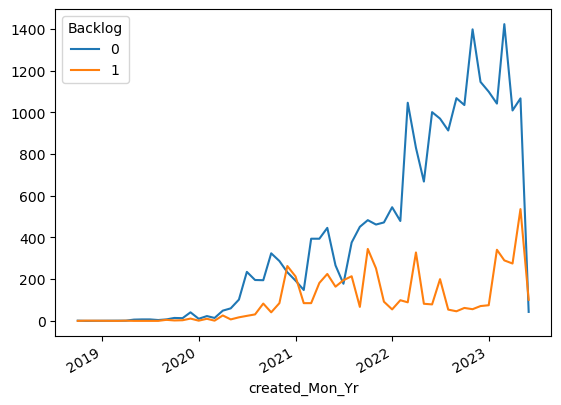

In [26]:
backlog_pivot_df.plot()

In [27]:
Incoming_pivot_df = pd.pivot_table(defect_df,index='created_Mon_Yr', values=['Incoming'], aggfunc='sum')
# defect_df['created_Mon_Yr'] = defect_df['created_Mon_Yr'].astype('category')
# Incoming_pivot_df = defect_df[['created_Mon_Yr','Incoming']]
Incoming_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2018-10-01 to 2023-06-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Incoming  54 non-null     int32
dtypes: int32(1)
memory usage: 648.0 bytes


<Axes: xlabel='created_Mon_Yr'>

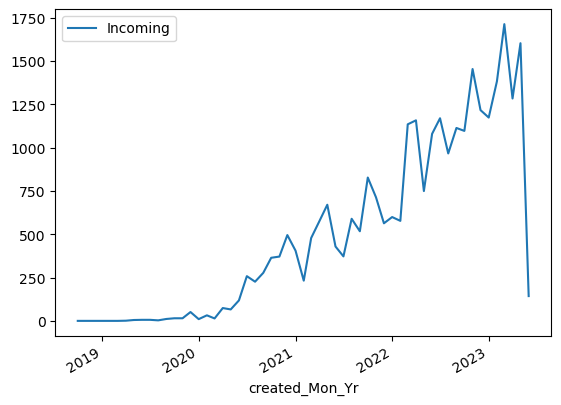

In [28]:
Incoming_pivot_df.plot()

In [29]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(Incoming_pivot_df['Incoming'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Number of Observations Used: %f' % result[3])

ADF Statistic: -0.077347
p-value: 0.951649
Lags Used: 9.000000
Number of Observations Used: 44.000000


In [30]:
#Differenecing 
Incoming_pivot_df['Incoming First Difference'] = Incoming_pivot_df['Incoming'] - Incoming_pivot_df['Incoming'].shift(1)


In [31]:
Incoming_pivot_df.head()

Incoming  Incoming First Difference
created_Mon_Yr                                     
2018-10-01             1                        NaN
2018-11-01             1                        0.0
2019-03-01             1                        0.0
2019-04-01             2                        1.0
2019-05-01             6                        4.0

In [32]:
#Sessional difference
Incoming_pivot_df['Incoming Quarter Difference'] = Incoming_pivot_df['Incoming'] - Incoming_pivot_df['Incoming'].shift(3)

In [33]:
Incoming_pivot_df.head()

Incoming  Incoming First Difference  \
created_Mon_Yr                                        
2018-10-01             1                        NaN   
2018-11-01             1                        0.0   
2019-03-01             1                        0.0   
2019-04-01             2                        1.0   
2019-05-01             6                        4.0   

                Incoming Quarter Difference  
created_Mon_Yr                               
2018-10-01                              NaN  
2018-11-01                              NaN  
2019-03-01                              NaN  
2019-04-01                              1.0  
2019-05-01                              5.0

In [34]:
# Again test dickey fuller test
# adfuller_test(df['Seasonal First Difference'].dropna())
result = adfuller(Incoming_pivot_df['Incoming Quarter Difference'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Number of Observations Used: %f' % result[3])

ADF Statistic: -1.771889
p-value: 0.394504
Lags Used: 10.000000
Number of Observations Used: 40.000000


<Axes: xlabel='created_Mon_Yr'>

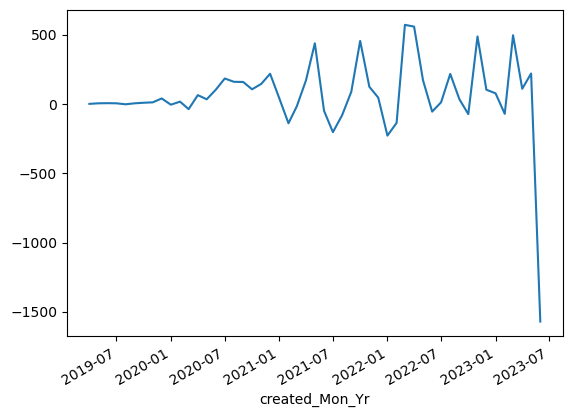

In [35]:
Incoming_pivot_df['Incoming Quarter Difference'].plot()

<b>Thoughs on  Autocorrelation and Partial Autocorrelation</b>
Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Python-Projects\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


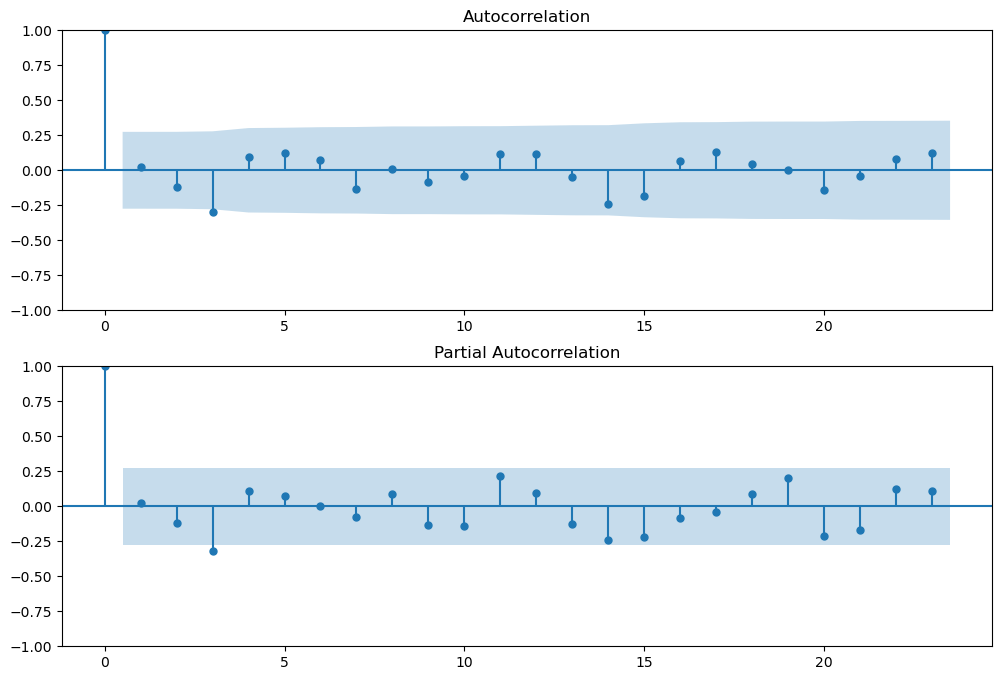

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Incoming_pivot_df['Incoming Quarter Difference'].iloc[3:],lags=23,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Incoming_pivot_df['Incoming Quarter Difference'].iloc[3:],lags=23,ax=ax2)

In [38]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [39]:
Incoming_pivot_df.index.freq = Incoming_pivot_df.index.inferred_freq
Incoming_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2018-10-01 to 2023-06-01
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Incoming                     54 non-null     int32  
 1   Incoming First Difference    53 non-null     float64
 2   Incoming Quarter Difference  51 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.5 KB


In [40]:
model=ARIMA(Incoming_pivot_df['Incoming'],order=(1,1,1))
model_fit=model.fit()

C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Incoming   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -366.818
Date:                Tue, 25 Jul 2023   AIC                            739.637
Time:                        10:43:51   BIC                            745.548
Sample:                             0   HQIC                           741.910
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1715      0.473     -0.363      0.717      -1.098       0.755
ma.L1         -0.5009      0.426     -1.174      0.240      -1.337       0.335
sigma2      5.964e+04   5514.470     10.816      0.000    4.88e+04    7.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               714.88
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):              64.15   Skew:                            -3.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
Incoming_pivot_df.index

DatetimeIndex(['2018-10-01', '2018-11-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[n

<Axes: xlabel='created_Mon_Yr'>

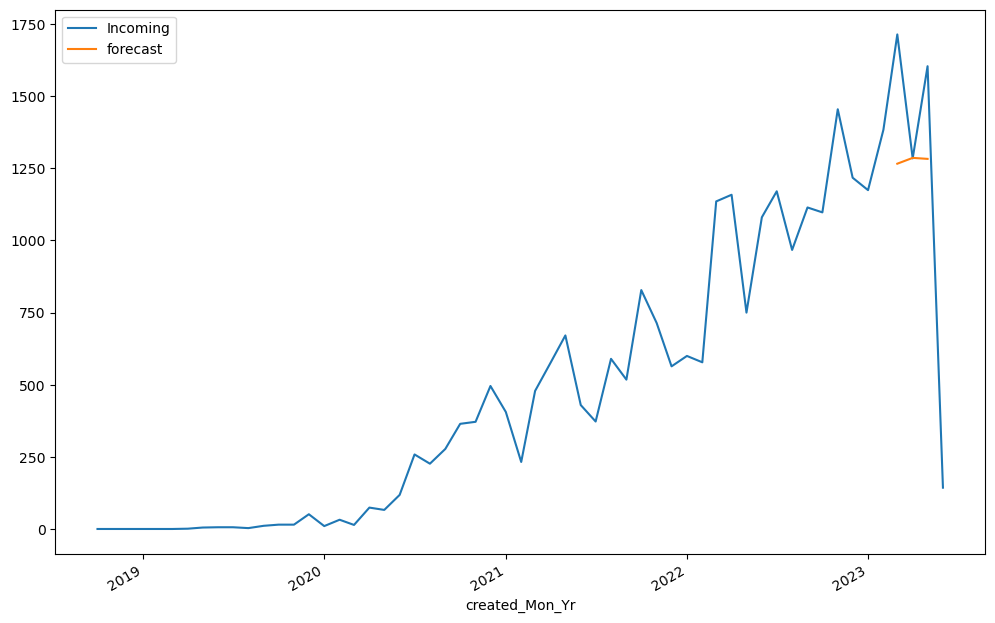

In [43]:
Incoming_pivot_df['forecast']=model_fit.predict(start=50,end=52,dynamic=True)
Incoming_pivot_df[['Incoming','forecast']].plot(figsize=(12,8))

In [44]:
import statsmodels.api as sm

In [45]:
model = sm.tsa.statespace.SARIMAX(Incoming_pivot_df['Incoming'],order=(1,1,1),seasonal_order=(1,1,1,3))
result = model.fit()

C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
Incoming_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2018-10-01 to 2023-06-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Incoming                     54 non-null     int32  
 1   Incoming First Difference    53 non-null     float64
 2   Incoming Quarter Difference  51 non-null     float64
 3   forecast                     3 non-null      float64
dtypes: float64(3), int32(1)
memory usage: 1.9 KB


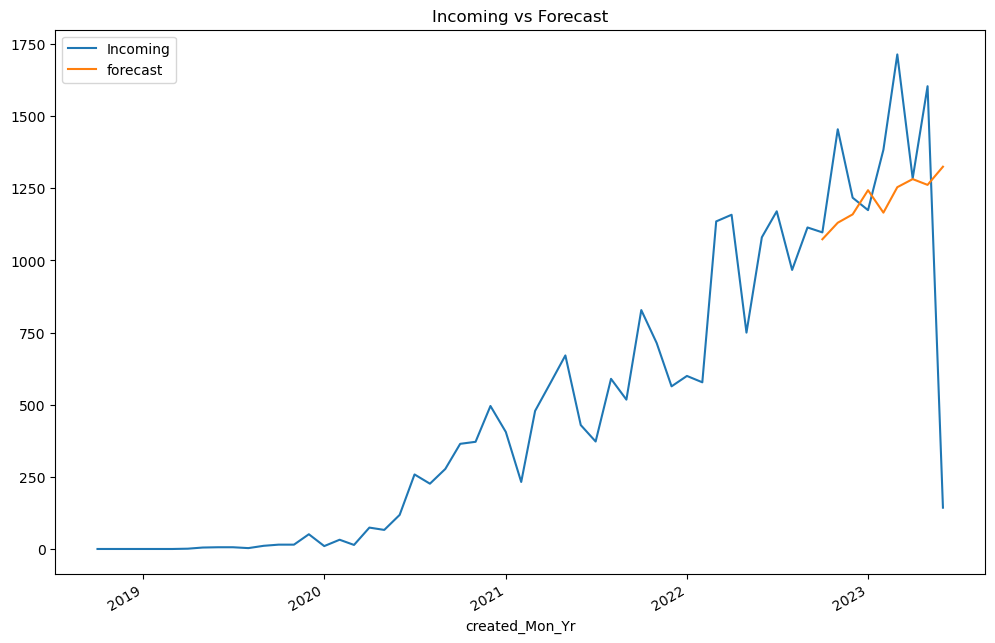

In [47]:
Incoming_pivot_df['forecast']=result.predict(start=45,end=53,dynamic=True)
Incoming_pivot_df[['Incoming','forecast']].plot(figsize=(12,8))

# for index, row in Incoming_pivot_df.iterrows():
#     plt.text(index, row['Incoming'], str(row['Incoming'].astype(int)), ha='center', va='bottom')
#     plt.text(index, row['forecast'], str(row['forecast'].astype(int)), ha='center', va='bottom')

# Customize the plot
# plt.xlabel('Index')
# plt.ylabel('Value')
plt.title('Incoming vs Forecast')

# Display the plot
plt.show()


In [48]:
print(Incoming_pivot_df.index)

DatetimeIndex(['2018-10-01', '2018-11-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[n

In [49]:
#forcasting data by creating future data set
from pandas.tseries.offsets import DateOffset
future_dates=[Incoming_pivot_df.index[-1]+ DateOffset(months=x)for x in range(0,5)]

In [50]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=Incoming_pivot_df.columns)

In [51]:
future_datest_df.head()

Incoming Incoming First Difference Incoming Quarter Difference  \
2023-07-01      NaN                       NaN                         NaN   
2023-08-01      NaN                       NaN                         NaN   
2023-09-01      NaN                       NaN                         NaN   
2023-10-01      NaN                       NaN                         NaN   

           forecast  
2023-07-01      NaN  
2023-08-01      NaN  
2023-09-01      NaN  
2023-10-01      NaN

In [52]:
future_df=pd.concat([Incoming_pivot_df,future_datest_df])

In [53]:
future_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2018-10-01 to 2023-10-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Incoming                     54 non-null     object 
 1   Incoming First Difference    53 non-null     float64
 2   Incoming Quarter Difference  51 non-null     float64
 3   forecast                     9 non-null      float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


In [54]:
future_df['forecast'] = result.predict(start = 53, end = 56,dynamic= True) 
future_df['forecast'].tail()

C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2023-06-01   NaN
2023-07-01   NaN
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
Name: forecast, dtype: float64

C:\Python-Projects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'Actual Incoming vs Future Incoming Forecast')

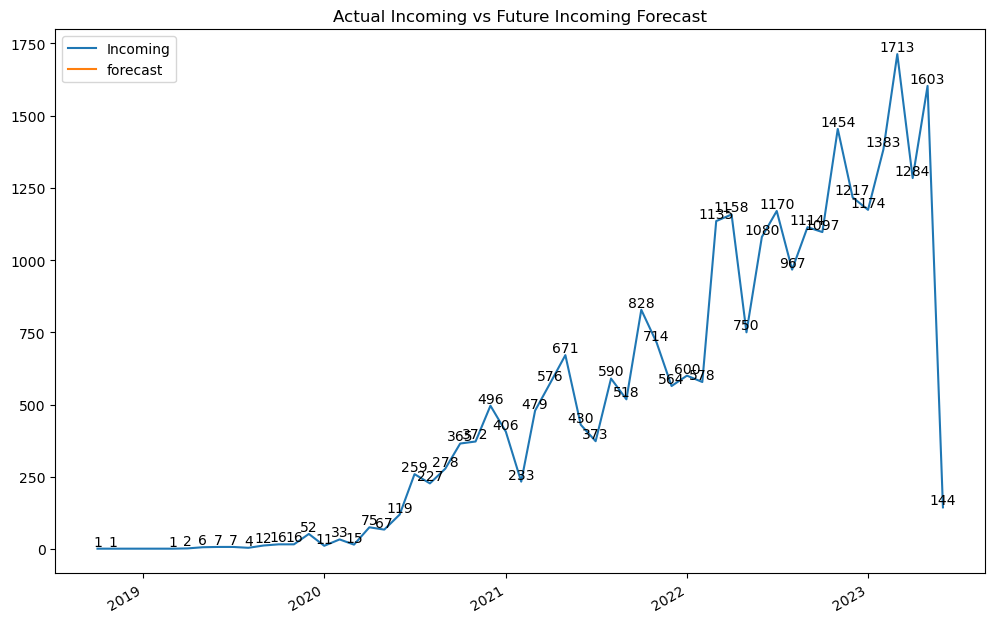

In [55]:
future_df['forecast'] = result.predict(start = 51, end = 54, dynamic= True)  
future_df[['Incoming', 'forecast']].plot(figsize=(12, 8)) 
for index, row in future_df.iterrows():
    if not pd.isnull(row['Incoming']):
        plt.text(index, row['Incoming'], str(int(row['Incoming'])), ha='center', va='bottom')
    if not pd.isnull(row['forecast']):
        plt.text(index, row['forecast'], str(int(row['forecast'])), ha='center', va='center')

# Customize the plot
# plt.xlabel('Index')
# plt.ylabel('Value')
plt.title('Actual Incoming vs Future Incoming Forecast')

# Display the